In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# df.drop(columns = ['User ID','Gender'],inplace = True) evabeo kora jay.
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

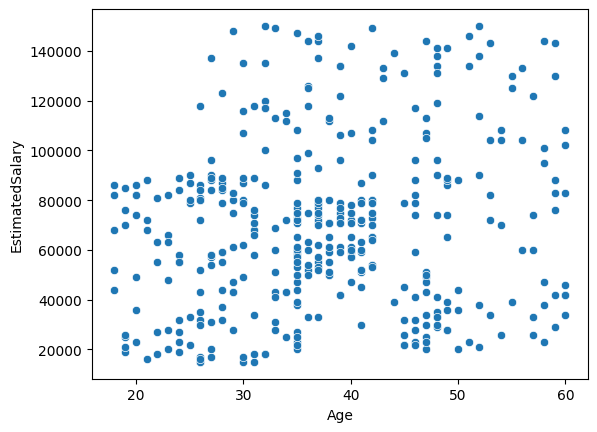

In [5]:
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1])
plt.show()

- ```Ekhane clear dekha jacche Age and Salary er value er difference onek. I mean Age er value range 0 to 100 er moddhye ar salary er range 10000+ , tai ei obosthay model k train korle sei result ekdom valo hobe na.```

- ```Er jonno Scaling korte hobe and Age, Salary er value gula k kachakachi or same range er moddhye niye ashte hobe.```

- ```Tai amra StandardScaling use korbo```


- ``` তার আগে দেখে নেই স্কেলিং না করলে মডেল কেমন behave করে। ```

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4872 - loss: 410.5050 - val_accuracy: 0.4000 - val_loss: 273.7393
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3919 - loss: 180.8724 - val_accuracy: 0.6000 - val_loss: 33.2608
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 45.3796 - val_accuracy: 0.6000 - val_loss: 16.6434
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4709 - loss: 70.6705 - val_accuracy: 0.4000 - val_loss: 10.3328
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4535 - loss: 31.6122 - val_accuracy: 0.6000 - val_loss: 29.6698
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6221 - loss: 32.9354 - val_accuracy: 0.4000 - val_loss: 12.7101
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 14.9282 - val_accuracy: 0.4000 - val_loss: 39.9149
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 25.7976 - val_ac

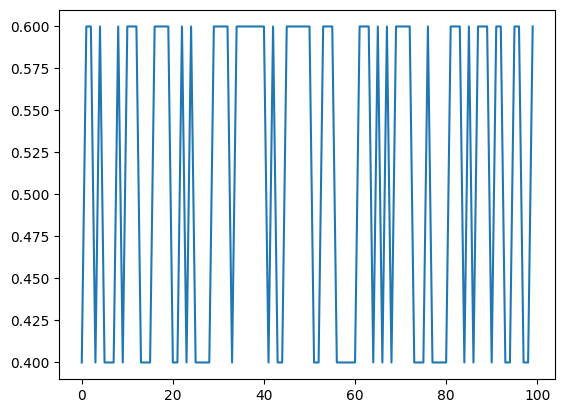

In [13]:
plt.plot(history.history['val_accuracy'])

- ```Graph theke clearly dekha jacche j Age and Salary er range er onek difference howar jonno val_accuracy er graph ta oscillate korteche. Mane model thikthak perform korteche na. accuracy er value 40 theke 60 er moddhyei bar bar oscillate korteche.```

- ``` ei problem solve korte pari scaling korar maddhyome. ```


- ``` এবার আমরা সেইম সব কাজ করব কিন্তু আগে স্কেলিং করে নিব।```

In [15]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

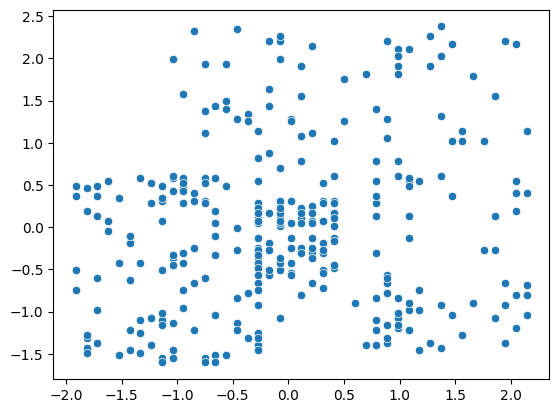

In [17]:
sns.scatterplot(x = X_train_scaled[:,0],y = X_train_scaled[:,1])

- ```Amra same plot tai pailam but ebar sob value -1 to 1 er moto ekta range e chole ashce motamoti```

In [19]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_data = (X_test_scaled, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8158 - loss: 0.6305 - val_accuracy: 0.8625 - val_loss: 0.5811
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.5806 - val_accuracy: 0.8125 - val_loss: 0.5344
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.5399 - val_accuracy: 0.8125 - val_loss: 0.4935
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.4983 - val_accuracy: 0.8125 - val_loss: 0.4595
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.4791 - val_accuracy: 0.8125 - val_loss: 0.4309
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.4443 - val_accuracy: 0.8125 - val_loss: 0.4064
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.4227 - val_accuracy: 0.8250 - val_loss: 0.3851
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.4004 - val_accuracy: 0.8375 - v

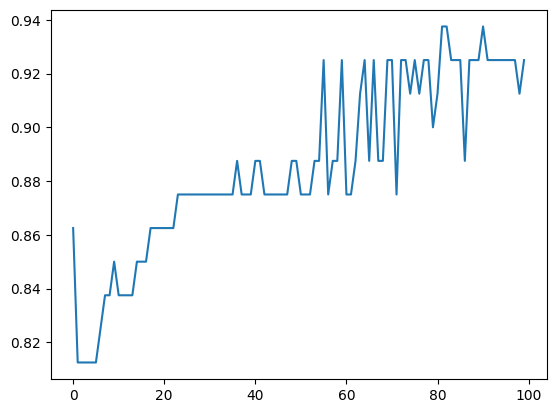

In [23]:
plt.plot(history.history['val_accuracy'])

- ``` Ekhane dekha jacce accuracy er unnoti hoyeche. ```